In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load Apple's stock price data from the provided CSV file
df = pd.read_csv('/Users/chizzycasa/Downloads/AAPL.csv', date_parser=True)

# Display the first few rows of the dataset
df.head()

# Use 'Close' column for price prediction
data = df['Close'].values.reshape(-1,1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Split data into training and testing sets (80% train, 20% test)
train_size = int(len(data_scaled) * 0.8)
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

# Function to create datasets for LSTM
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Prepare training and testing datasets
time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape inputs for LSTM (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

/var/folders/bv/v93_z1s54f96546k6h79c35c0000gn/T/ipykernel_24521/3741346947.py:10: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv('/Users/chizzycasa/Downloads/AAPL.csv', date_parser=True)


In [4]:
# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model (75 epochs)
history = model.fit(X_train, y_train, epochs=75, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/75


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


260/260 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 9.6481e-05 - val_loss: 0.0010
Epoch 2/75
260/260 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 2.8195e-06 - val_loss: 0.0013
Epoch 3/75
260/260 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 2.1834e-06 - val_loss: 0.0010
Epoch 4/75
260/260 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 2.7721e-06 - val_loss: 9.6589e-04
Epoch 5/75
260/260 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 2.0268e-06 - val_loss: 6.0308e-04
Epoch 6/75
260/260 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 2.1230e-06 - val_loss: 0.0013
Epoch 7/75
260/260 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 2.8597e-06 - val_loss: 9.9659e-04
Epoch 8/75
260/260 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 1.7952e-06 - val_loss: 0.0011
Epoch 9/75
260/260 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 1.6835e-06 - val_loss: 9.7572e-04
Epoch 10/75
260/260 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 1.5049e-06 - val_loss: 0.0016
Epoch 11/75
260/260 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 1.8632e-06 - val_loss:

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Root Mean Squared Error: 2.9229903744268895


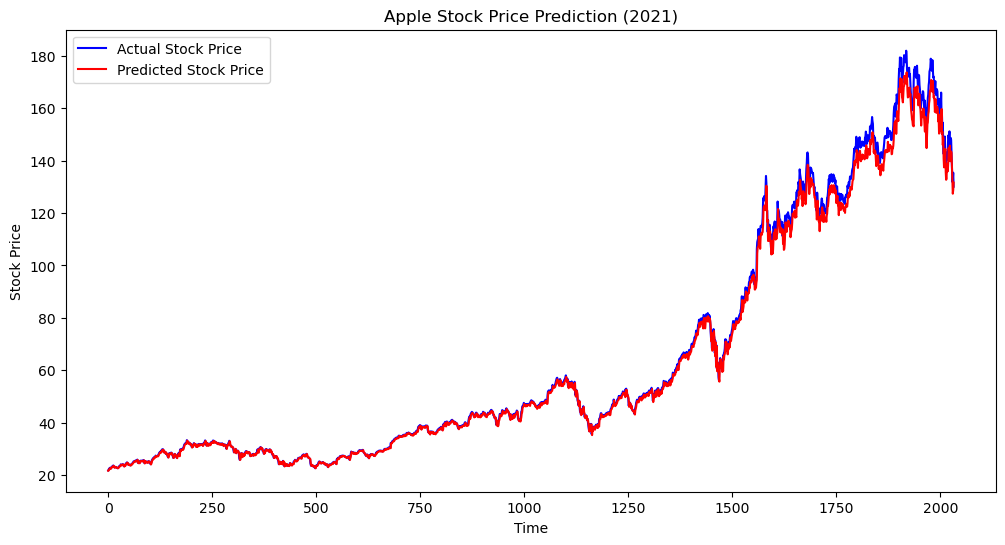

In [6]:
# Predicting stock prices on test data
y_pred = model.predict(X_test)

# Inverse scaling to get original price values
y_pred = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
print(f"Root Mean Squared Error: {rmse}")

# Plot results: Predicted vs Actual
plt.figure(figsize=(12,6))
plt.plot(y_test_actual, color='blue', label='Actual Stock Price')
plt.plot(y_pred, color='red', label='Predicted Stock Price')
plt.title('Apple Stock Price Prediction (2021)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


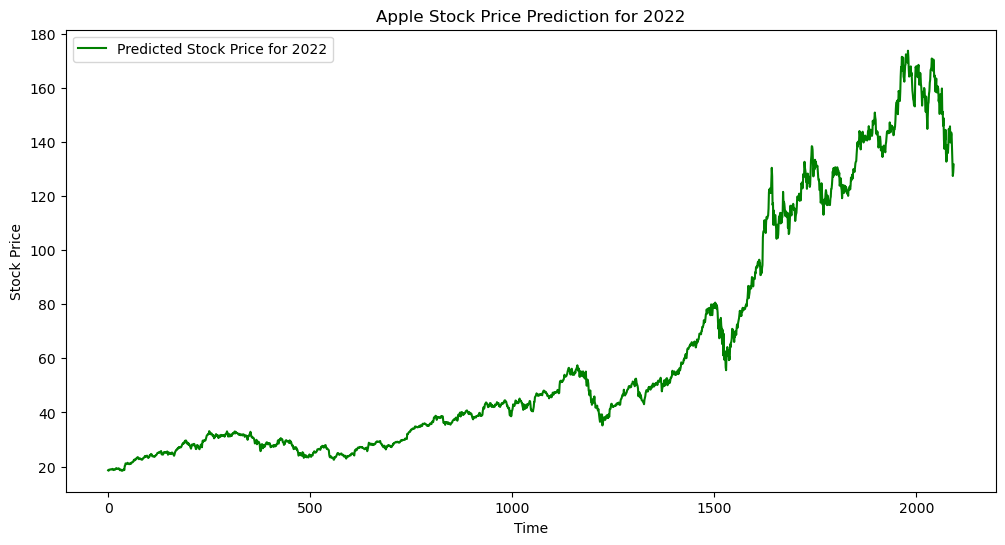

In [8]:
# Predict stock prices for 2022
inputs = data[len(data) - len(test_data) - time_step:]
inputs = inputs.reshape(-1, 1)
inputs_scaled = scaler.transform(inputs)

X_input, _ = create_dataset(inputs_scaled, time_step)
X_input = X_input.reshape(X_input.shape[0], X_input.shape[1], 1)

predicted_stock_price = model.predict(X_input)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Visualize the predictions for 2022
plt.figure(figsize=(12,6))
plt.plot(predicted_stock_price, color='green', label='Predicted Stock Price for 2022')
plt.title('Apple Stock Price Prediction for 2022')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()